In [23]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

a = 0.5; t0=0; N = 500; dt = 0.1; g = 9.81

#Warunki początkowe 1
fi_0 = 1.1; z_0 = 1.0; fi_1 = 0; z_1 = 0

tn = N * dt
t = np.linspace(t0, tn, N)
y = np.zeros((N, 4))
y[0] = fi_0, z_0, fi_1, z_1 

In [24]:
def RK4(k, dt, t, y):
    """
    Metoda RK4 do rozwiązywania układów równań różniczkowych.
    """
    for i in range(1, len(t)):
        k1 = k(t[i-1], y[i-1, :])
        k2 = k(t[i-1] + dt/2, y[i-1, :] + dt*k1/2)
        k3 = k(t[i-1] + dt/2, y[i-1, :] + dt*k2/2)
        k4 = k(t[i-1] + dt, y[i-1, :] + dt*k3)
        y[i, :] = y[i-1, :] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

def k(t, y):
    """
    Funkcja zwracająca wektor pochodnych funkcji y(t) dla układu równań różniczkowych.
    """
    y1, y2, y3, y4 = y[0], y[1], y[2], y[3]
    f1 = y3
    f2 = y4
    f3 = -g * np.cos(a)**2 / np.sin(a) * np.sin(y1) / y2 - 2 * y3 * y4 / y2
    f4 = np.sin(a)**2 * y2 * y3**2 - g * np.sin(a) * np.cos(a)**2 * (1 - np.cos(y1))
    return np.array([f1, f2, f3, f4])

y = RK4(k, dt, t, y)

In [25]:
#ENERGY
#E = 0.5 * ((sp.tan(a)*y[:, 1]*y[:,2])**2 + (y[:,3]/sp.cos(a))**2) + g*y[:,1]*sp.sin(a)*(1-sp.cos(y[:,0]))
E = 0.5 * ((np.tan(a)*y[:, 1]*y[:,2])**2 + (y[:,3]/np.cos(a))**2) + g*y[:,1]*np.sin(a)*(1-np.cos(y[:,0]))

In [26]:
#Układ stożka
ro = y[:,1] * np.tan(a)
r = np.zeros((N, 3))
xi = r[:,0] = ro*np.cos(y[:,0])
yi = r[:,1] = ro*np.sin(y[:,0])
zi = r[:,2] = y[:,1]

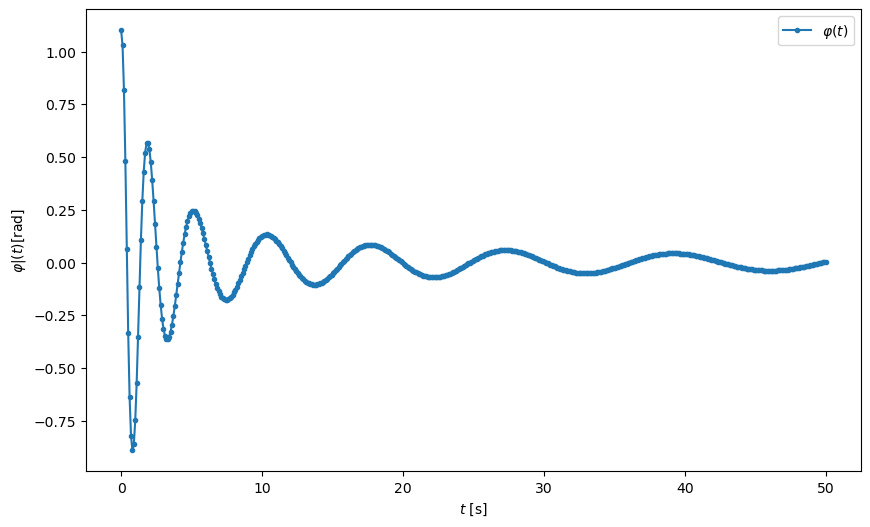

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(t, y[:,0], label=r'$\varphi(t) $',marker='.')

plt.xlabel('$t$ [s]')
plt.ylabel(r'$\varphi|(t) $[rad]')
plt.legend(loc='upper right')
#plt.title('Wykres położenia kąta azymutalnego w zależności od czasu')
plt.show()

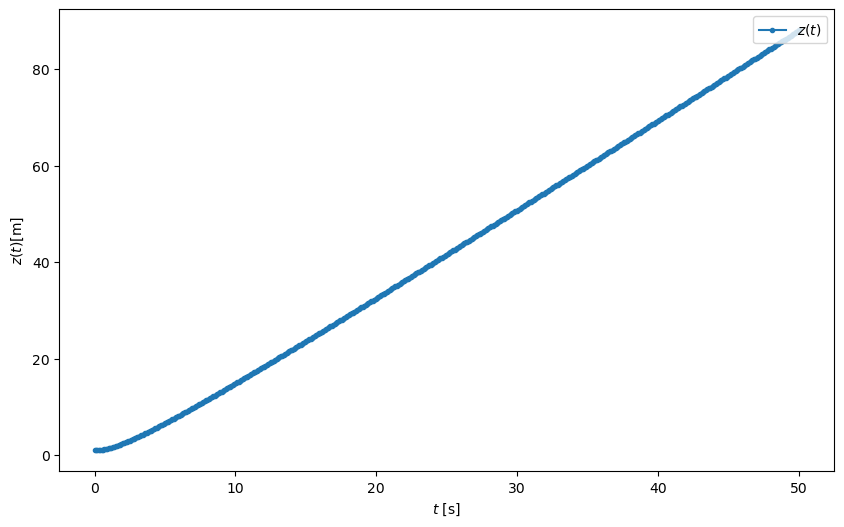

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(t, y[:,1], label=r'$z(t) $',marker='.')

plt.xlabel('$t$ [s]')
plt.ylabel(r'$z(t) $[m]')
plt.legend(loc='upper right')
#plt.title('Wykres położenia cząstki mierzonej wzdłuż osi stożka')
plt.show()

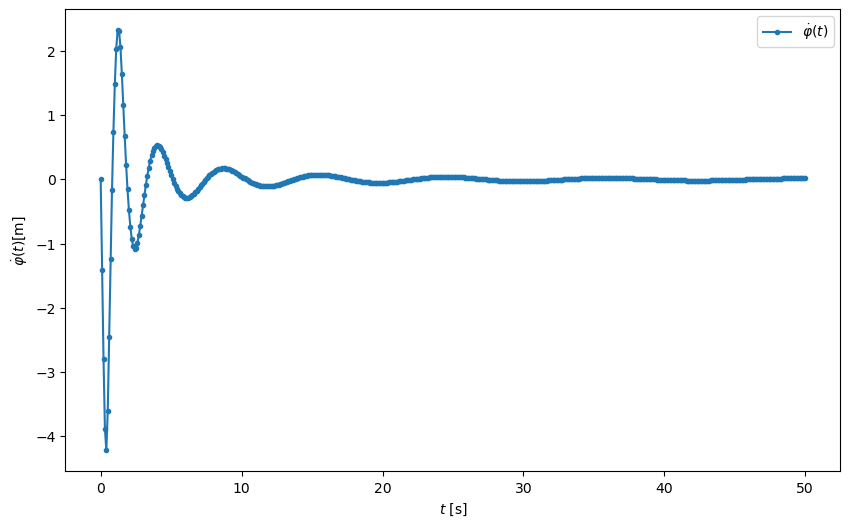

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(t, y[:,2], label=r'$\dot{\varphi}(t) $',marker='.')

plt.xlabel('$t$ [s]')
plt.ylabel(r'$\dot{\varphi}(t) $[m]')
plt.legend(loc='upper right')
#plt.title('Wykres prędkości azymutalnej w zależności od czasu')
plt.show()

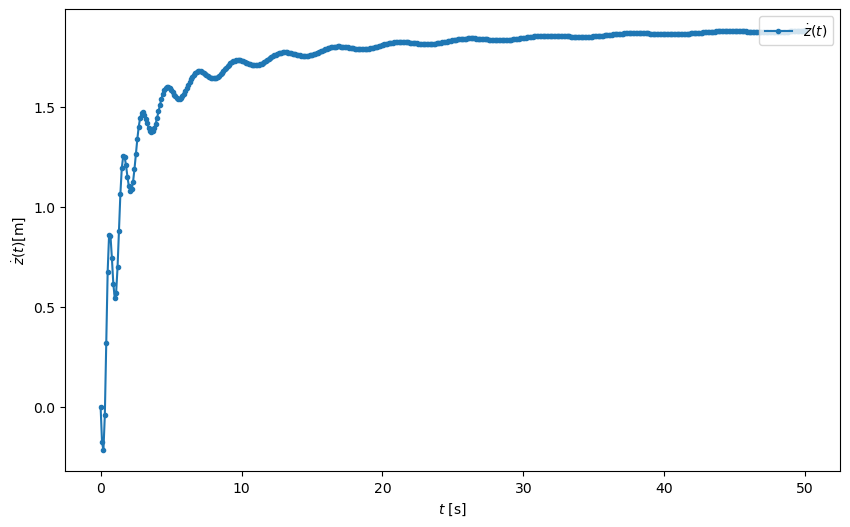

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(t, y[:,3], label=r'$\dot{z}(t) $',marker='.')

plt.xlabel('$t$ [s]')
plt.ylabel(r'$\dot{z}(t) $[m]')
plt.legend(loc='upper right')
#plt.title('Wykres prędkości cząstki mierzonej wzdłuż osi stożka')
plt.show()

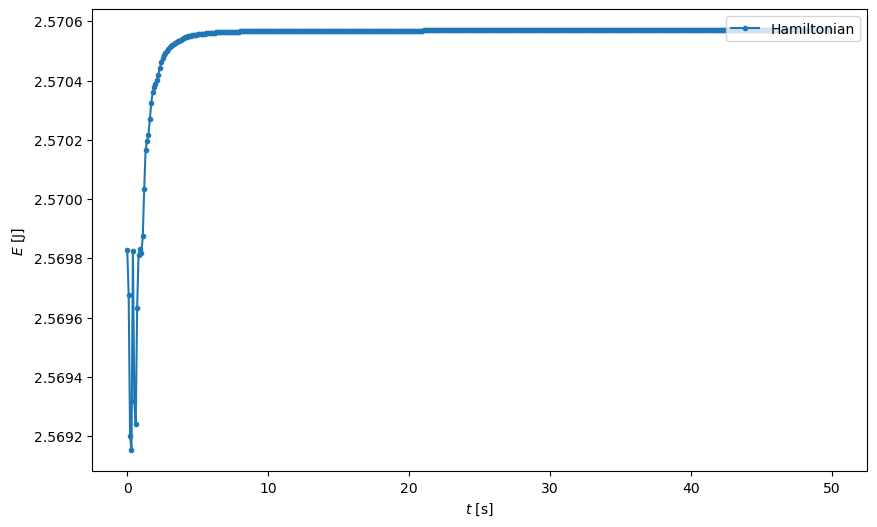

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(t, E, label='Hamiltonian',marker='.')

plt.xlabel('$t$ [s]')
plt.ylabel('$E$ [J]')
plt.legend(loc='upper right')
#plt.title('Wykres funkcji energii całkowitej cząstki poruszającej się po powierzchni stożka w zależności od czasu')
plt.show()

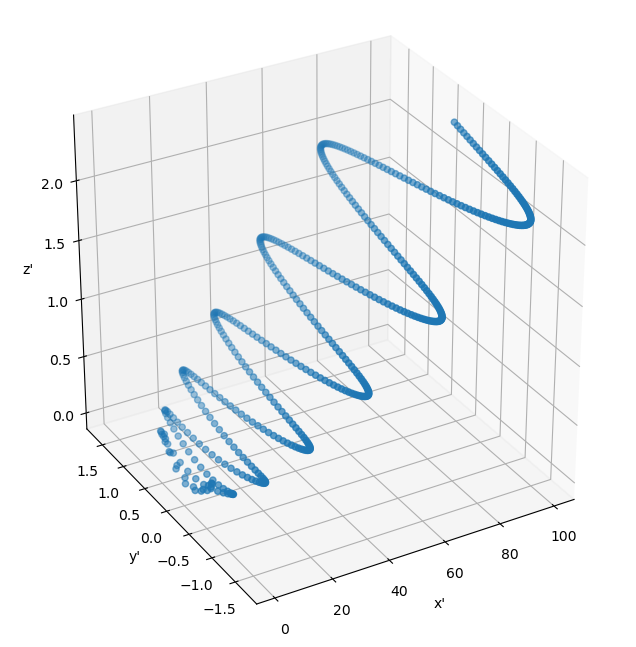

In [34]:
# Tworzenie macierzy M
theta = np.pi/3
M = np.zeros((3,3))
M[0,0] = np.cos(theta)
M[0,2] = np.sin(theta)
M[1,1] = 1
M[2,0] = -np.sin(theta)
M[2,2] = np.cos(theta)

# Tworzenie macierzy R
N = r.shape[0]
R = np.dot(r, M.T)

# Inicjalizacja wykresu 3D
fig = plt.figure(figsize=(8, 8))  # Ustawienie większego rozmiaru figury
ax = fig.add_subplot(111, projection='3d')

# Wygenerowanie wykresu 3D z inną perspektywą
ax.scatter(R[:, 0], R[:, 1], R[:, 2])

# Ustawienie perspektywy rzutu z innej strony
ax.view_init(elev=30, azim=-120)  # Zmiana elev (elevation) i azim (azimuth)

# Ustawienie etykiet osi
ax.set_xlabel('x\'')
ax.set_ylabel('y\'')
ax.set_zlabel('z\'')

# Dostosowanie proporcji osi
ax.set_box_aspect([1, 1, 1])  # Proporcje osi x, y, z są równe

# Wyświetlenie wykresu
plt.show()

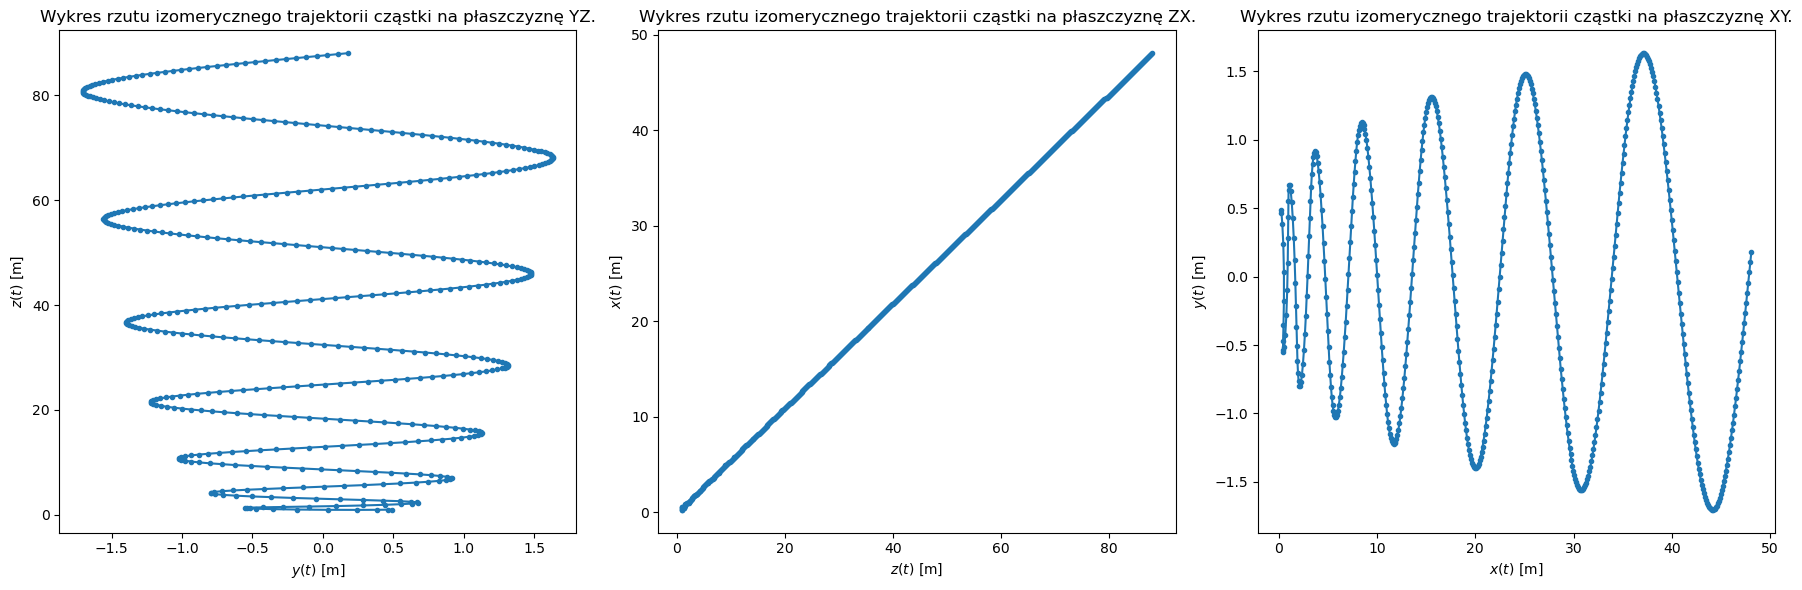

In [35]:
ro = y[:,1] * np.tan(a)
xi = ro*np.cos(y[:,0])
yi = ro*np.sin(y[:,0])
zi = y[:,1]

# Ustawienia podziału na subploty
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Wykres 1
axs[0].plot(yi, zi, marker='.')
axs[0].set_xlabel('$y(t)$ [m]')
axs[0].set_ylabel('$z(t)$ [m]')
axs[0].set_title('Wykres rzutu izomerycznego trajektorii cząstki na płaszczyznę YZ.')

# Wykres 2
axs[1].plot(zi, xi, marker='.')
axs[1].set_xlabel('$z(t)$ [m]')
axs[1].set_ylabel('$x(t)$ [m]')
axs[1].set_title('Wykres rzutu izomerycznego trajektorii cząstki na płaszczyznę ZX.')

# Wykres 3
axs[2].plot(xi, yi, marker='.')
axs[2].set_xlabel('$x(t)$ [m]')
axs[2].set_ylabel('$y(t)$ [m]')
axs[2].set_title('Wykres rzutu izomerycznego trajektorii cząstki na płaszczyznę XY.')

plt.tight_layout()  # Dopasowanie subplotów
plt.show()